Intercept (bias): 4.142913319458566
Coefficient (weight): 2.7993236574802762
Mean Squared Error: 0.65


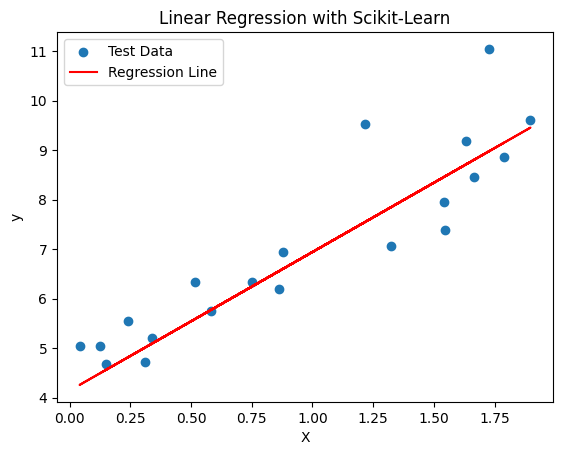

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the model parameters
print(f"Intercept (bias): {model.intercept_[0]}")
print(f"Coefficient (weight): {model.coef_[0][0]}")
print(f"Mean Squared Error: {mse:.2f}")

# Plot the data and regression line
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Scikit-Learn")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
df=pd.read_csv('/content/1.01. Simple linear regression.csv')

In [ ]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [ ]:
X=df['SAT']
y=df['GPA']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np

X_train_reshaped = np.array(X_train).reshape(-1, 1)



In [ ]:
X_test_reshaped = np.array(X_test).reshape(-1, 1)

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(X_train_reshaped, y_train)

LinearRegression()

In [ ]:
y_pre = lr.predict(X_test_reshaped )

In [ ]:
mse=mean_squared_error(y_test,y_pre)

In [ ]:
mse

0.05248610269753723

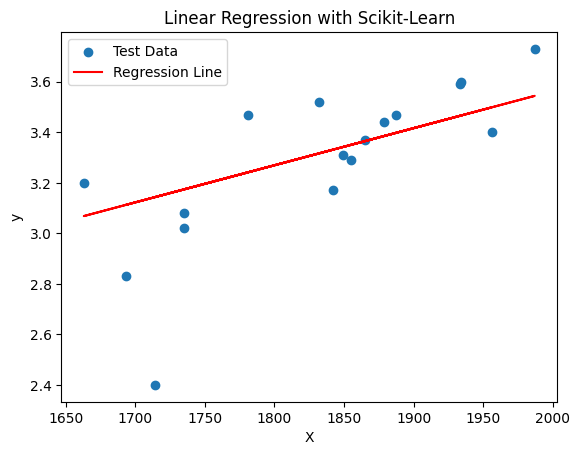

In [ ]:
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, y_pre, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Scikit-Learn")
plt.legend()
plt.show()

In [ ]:
w = lr.coef_
w

array([0.0014687])

In [ ]:
b =lr.intercept_
b

0.6258624722253536

gradient descent

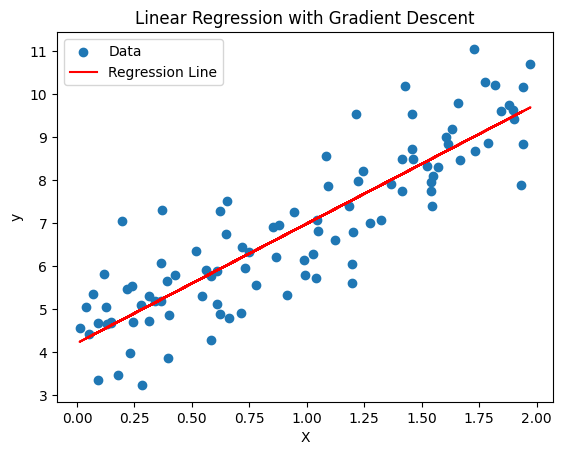

Learned weight (w): 2.7755308615708514
Learned bias (b): 4.208960473926773


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate some dummy data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Initialize parameters
w = np.random.randn(1, 1)
b = np.random.randn()

# Set hyperparameters
learning_rate = 0.01
max_iterations = 1000

# Gradient descent algorithm
for t in range(max_iterations):
    # Compute predictions
    predictions = X.dot(w) + b

    # Compute error (difference between actual and predicted values)
    error = y - predictions

    # Compute gradients
    gradient_w = -2 * X.T.dot(error) / len(X)
    gradient_b = -2 * np.sum(error) / len(X)

    # Update parameters
    w -= learning_rate * gradient_w
    b -= learning_rate * gradient_b

# Plot the data and regression line
plt.scatter(X, y, label='Data')
plt.plot(X, X.dot(w) + b, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

# Print the learned parameters
print(f'Learned weight (w): {w[0][0]}')
print(f'Learned bias (b): {b}')


Batch gradient descent

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
10,1800,3,82.00
12,1000,2,38.00
0,1056,2,39.07
2,1440,3,62.00
9,3700,5,167.00


In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [ ]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0] # number of rows in X

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [ ]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

stochastic gradient descent

In [ ]:
import random
random.randint(0,6)

3

In [ ]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70505731, 0.6745873 ]), -0.22883659754251626, 0.052471078059877246)

In [ ]:
predict(2600,4,w_sgd, b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.48796324185406